In [0]:
!wget "http://cb.lk/covid_19"

In [0]:
!unzip covid_19

In [1]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
## CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
# Training 
train_datagen =  image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [9]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 59s 7s/step - loss: 0.8678 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 50s 6s/step - loss: 0.6355 - accuracy: 0.6914 - val_loss: 0.6260 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 50s 6s/step - loss: 0.3761 - accuracy: 0.8203 - val_loss: 0.1729 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 50s 6s/step - loss: 0.2426 - accuracy: 0.9180 - val_loss: 0.1257 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 50s 6s/step - loss: 0.2033 - accuracy: 0.9336 - val_loss: 0.1126 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 51s 6s/step - loss: 0.1489 - accuracy: 0.9453 - val_loss: 0.0790 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 54s 7s/step - loss: 0.1191 - accuracy: 0.9609 - val_loss: 0.1539 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [0]:
# TODO-
# Class Activation Maps
# Grad CAM

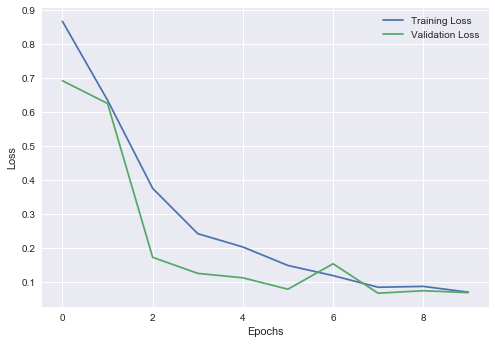

In [10]:
# Visualization
import matplotlib.pyplot as plt

h = hist.history
plt.style.use('seaborn')
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

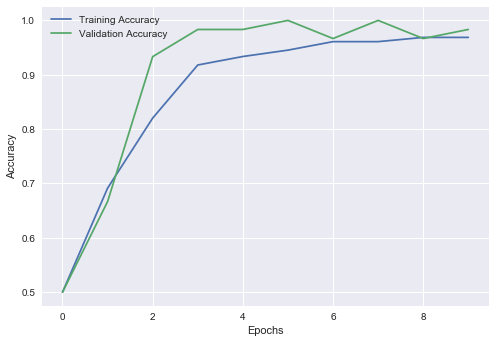

In [11]:
plt.style.use('seaborn')
plt.plot(h['accuracy'],label='Training Accuracy')
plt.plot(h['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
## Plot Confusion Matrix